In [160]:
import seaborn as sns
import matplotlib.pyplot as plt
from risk_experiment.cogmodels.fit_probit import build_model, get_data
import arviz as az
import numpy as np
from risk_experiment.cogmodels.utils import extract_intercept_gamma

sns.set_theme('paper', 'white', font='helvetica', font_scale=1.5, palette='tab10')

In [159]:
def load(model_label, session, bids_folder='/data/ds-risk'):
    df = get_data(model_label, session, bids_folder)
    model = build_model(model_label, df, session, bids_folder)
    if session is None:
        idata = az.from_netcdf(f'/data/ds-risk/derivatives/cogmodels/model-{model_label}_trace.netcdf')
    else:
        idata = az.from_netcdf(f'/data/ds-risk/derivatives/cogmodels/model-{model_label}_ses-{session}_trace.netcdf')

    return df, model, idata

def get_hdi(x):
    return tuple(az.hdi(x.values))

df, model, idata = load('probit_neural9', None)

100%|██████████| 30/30 [00:03<00:00,  9.99it/s]


In [161]:
intercept, gamma = extract_intercept_gamma(idata, model, df, group=True)
rnp = np.exp(intercept['intercept']/gamma['gamma']).stack([-2, -1]).to_frame('rnp')
rnp.index = rnp.index.set_levels(rnp.index.levels[1].astype(int), level=1)

In [166]:
example_rnps = rnp.xs(True, 0, 'risky_first').groupby(['median_split_sd', 'n_safe']).mean()

In [167]:
example_rnps

rnp
median_split_sd n_safe          
False           5       0.588172
                7       0.546750
                10      0.469754
                14      0.416470
                20      0.395108
                28      0.384758
True            5       0.592994
                7       0.571206
                10      0.424281
                14      0.420193
                20      0.368597
                28      0.351183

,rnp
n_safe,
5,0.588172
7,0.546750
10,0.469754
14,0.416470
20,0.395108
28,0.384758


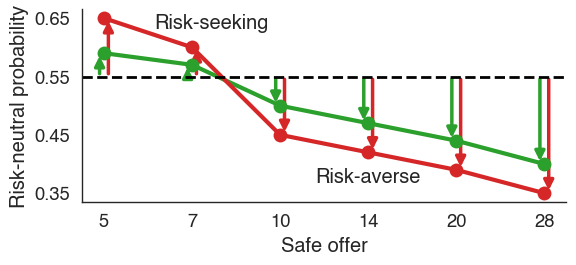

In [189]:
safe_n = [5, 7, 10, 14, 20, 28]
low_noise = [.59, .57, .5, .47, .44, .4]
high_noise = [.65, .6, .45, .42, .39, .35]

# low_noise = example_rnps.xs(False, 0, 0)['rnp'].tolist()
# high_noise = example_rnps.xs(True, 0, 0)['rnp'].tolist()

palette = sns.color_palette()[2:4]


ax = plt.gca()

plt.xticks(range(6), safe_n)
plt.yticks()

ix = 0
for ix in range(6):
    # ax.arrow(ix, .55, 0.0, low_noise[ix] - .55, fc=palette[0], color=palette[0], lw=4, arrowprops=dict(arrowstyle="->"))
    ax.annotate("", xy=(ix+.05, high_noise[ix]), xytext=(ix+.05, 0.55), arrowprops=dict(arrowstyle="-|>", color=palette[1], fc=palette[1], lw=2.5), zorder=1)
    ax.annotate("", xy=(ix-.05, low_noise[ix]), xytext=(ix-.05, 0.55), arrowprops=dict(arrowstyle="-|>", color=palette[0], fc=palette[0], lw=2.5), zorder=1)


plt.plot(range(6), low_noise, marker='o', markersize=10, markeredgewidth=0, c=palette[0], lw=3, ls='-')
plt.plot(range(6), high_noise, marker='o', markersize=10, markeredgewidth=0, c=palette[1], lw=3, ls='-')
plt.axhline(0.55, c='k', ls='--', lw=2)

sns.despine()

plt.ylabel('Risk-neutral probability')
plt.yticks([.35, .45, .55, .65])
plt.xlabel('Safe offer')

ax.annotate('Risk-averse', xy=(.7, .1), xycoords='axes fraction', clip_on=False, ha='right', fontstyle='italic')
ax.annotate('Risk-seeking', xy=(.15, .9), xycoords='axes fraction', clip_on=False, ha='left')

height = 2.5
ax.get_figure().set_size_inches(2.5*2.5, 2.5)

plt.savefig('/data/ds-risk/derivatives/figures/rnp_distance_illustration.pdf', bbox_inches='tight')

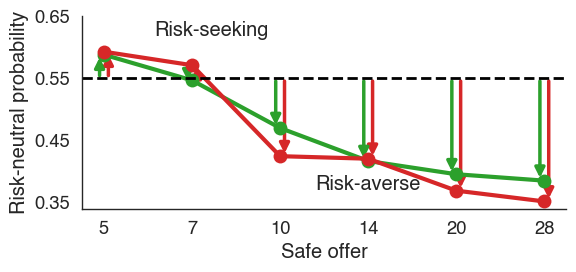

In [188]:
safe_n = [5, 7, 10, 14, 20, 28]
low_noise = [.59, .57, .5, .47, .44, .4]
high_noise = [.65, .6, .45, .42, .39, .35]

low_noise = example_rnps.xs(False, 0, 0)['rnp'].tolist()
high_noise = example_rnps.xs(True, 0, 0)['rnp'].tolist()

palette = sns.color_palette()[2:4]


ax = plt.gca()

plt.xticks(range(6), safe_n)
plt.yticks()

ix = 0
for ix in range(6):
    # ax.arrow(ix, .55, 0.0, low_noise[ix] - .55, fc=palette[0], color=palette[0], lw=4, arrowprops=dict(arrowstyle="->"))
    ax.annotate("", xy=(ix+.05, high_noise[ix]), xytext=(ix+.05, 0.55), arrowprops=dict(arrowstyle="-|>", color=palette[1], fc=palette[1], lw=2.5), zorder=1)
    ax.annotate("", xy=(ix-.05, low_noise[ix]), xytext=(ix-.05, 0.55), arrowprops=dict(arrowstyle="-|>", color=palette[0], fc=palette[0], lw=2.5), zorder=1)


plt.plot(range(6), low_noise, marker='o', markersize=10, markeredgewidth=0, c=palette[0], lw=3, ls='-')
plt.plot(range(6), high_noise, marker='o', markersize=10, markeredgewidth=0, c=palette[1], lw=3, ls='-')
plt.axhline(0.55, c='k', ls='--', lw=2)

sns.despine()

plt.ylabel('Risk-neutral probability')
plt.yticks([.35, .45, .55, .65])
plt.xlabel('Safe offer')

ax.annotate('Risk-averse', xy=(.7, .1), xycoords='axes fraction', clip_on=False, ha='right', fontstyle='italic')
ax.annotate('Risk-seeking', xy=(.15, .9), xycoords='axes fraction', clip_on=False, ha='left')

height = 2.5
ax.get_figure().set_size_inches(2.5*2.5, 2.5)

plt.savefig('/data/ds-risk/derivatives/figures/rnp_distance_illustration_real_data.pdf', bbox_inches='tight')

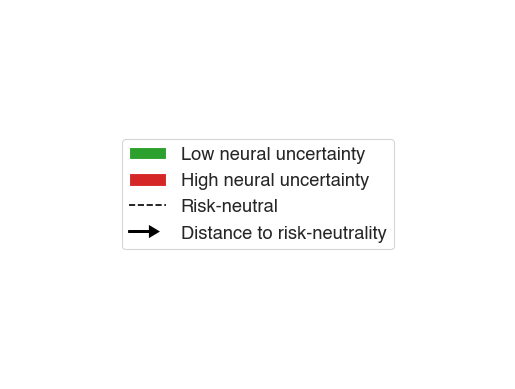

In [157]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch, FancyArrow
from matplotlib.legend_handler import HandlerPatch


fig = plt.gcf()

def make_legend_arrow(legend, orig_handle,
                      xdescent, ydescent,
                      width, height, fontsize):

    p = FancyArrow(0,
                    0.50*height,
                    15,
                    0,
                    head_width=6,
                    head_length=5,
                    edgecolor='k',
                    facecolor='w',
                    linewidth=5,
                    )
    
    return p

legend_elements = [Patch(facecolor=sns.color_palette()[2], label='Low neural uncertainty'),
                   Patch(facecolor=sns.color_palette()[3], label='High neural uncertainty'),
                   Line2D([0], [0], color='k', ls='--', label='Risk-neutral'),
                    FancyArrow(0.0, 0.0, 0.5, 0.5, label='Distance to risk-neutrality', color='k', fc='k', lw=2) ]


legend = plt.legend(handles=legend_elements, loc='center',
                    handler_map={FancyArrow : HandlerPatch(patch_func=make_legend_arrow), })
plt.axis('off')

bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
# fig.savefig(filename, dpi="figure", bbox_inches=bbox)

plt.savefig('/data/ds-risk/derivatives/figures/rnp_distance_legend.pdf', bbox_inches=bbox)

In [132]:
FancyArrow?

Init signature:
FancyArrow(
    x,
    y,
    dx,
    dy,
    *,
    width=0.001,
    length_includes_head=False,
    head_width=None,
    head_length=None,
    shape='full',
    overhang=0,
    head_starts_at_zero=False,
    **kwargs,
)
Docstring:      Like Arrow, but lets you set head width and head height independently.
Init docstring:
Parameters
----------
x, y : float
    The x and y coordinates of the arrow base.

dx, dy : float
    The length of the arrow along x and y direction.

width : float, default: 0.001
    Width of full arrow tail.

length_includes_head : bool, default: False
    True if head is to be counted in calculating the length.

head_width : float or None, default: 3*width
    Total width of the full arrow head.

head_length : float or None, default: 1.5*head_width
    Length of arrow head.

shape : {'full', 'left', 'right'}, default: 'full'
    Draw the left-half, right-half, or full arrow.

overhang : float, default: 0
    Fraction that the arrow is swept back 